In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO

In [ ]:
import pandas as pd
from zipfile import ZipFile

z = ZipFile('/content/names.zip')
a = z.namelist()

# Filter year files only
year_files = [name for name in a if name.endswith('.txt') and name.startswith('yob')]

df_list = []

for filename in year_files:
    try:
        # Extract year from file name e.g. 'yob1880.txt' → 1880
        year = int(filename[-8:-4])

        with z.open(filename) as file:
            df = pd.read_csv(file, encoding='utf-8', engine='python', header=None, names=['Name', 'Gender', 'Births'])
            df['Year'] = year  # Add year column
            df_list.append(df)
    except Exception as e:
        print(f"Error reading file {filename}: {e}")

# Combine all into one DataFrame
df = pd.concat(df_list, ignore_index=True)
display(df.head())

Error reading file yob1880.txt: Bad magic number for file header
Error reading file yob1881.txt: Bad magic number for file header
Error reading file yob1882.txt: Bad magic number for file header
Error reading file yob1883.txt: Bad magic number for file header
Error reading file yob1884.txt: Bad magic number for file header
Error reading file yob1885.txt: Bad magic number for file header
Error reading file yob1886.txt: Bad magic number for file header
Error reading file yob1887.txt: Bad magic number for file header
Error reading file yob1888.txt: Bad magic number for file header
Error reading file yob1889.txt: Bad magic number for file header
Error reading file yob1890.txt: Bad magic number for file header
Error reading file yob1891.txt: Bad magic number for file header
Error reading file yob1892.txt: Bad magic number for file header
Error reading file yob1893.txt: Bad magic number for file header
Error reading file yob1894.txt: Bad magic number for file header
Error reading file yob189

,Name,Gender,Births,Year
0,Mary,F,64153,1930
1,Betty,F,38238,1930
2,Dorothy,F,30409,1930
3,Helen,F,19913,1930
4,Margaret,F,18351,1930


In [ ]:

z = ZipFile('/content/names.zip')

a = z.namelist()

In [ ]:
'''Then, visualize the number of male and female babies born in a particular
year with the help of pandas. DataFrame.plot, then analyze baby names
by sorting out all birth counts'''


'Then, visualize the number of male and female babies born in a particular\nyear with the help of pandas. DataFrame.plot, then analyze baby names\nby sorting out all birth counts'

/tmp/ipython-input-3340555461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Births', data=data_year, estimator=sum, palette=['pink', 'lightblue'])


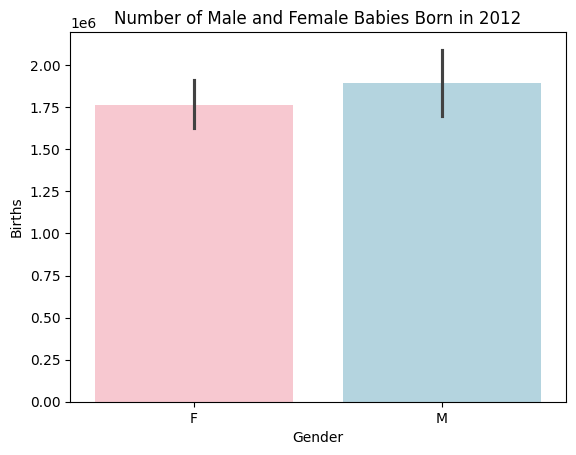

In [ ]:
year = 2012
data_year = df[df['Year'] == year]

sns.barplot(x='Gender', y='Births', data=data_year, estimator=sum, palette=['pink', 'lightblue'])
plt.title(f'Number of Male and Female Babies Born in {year}')
plt.show()


In [ ]:
top_names = data_year.sort_values(by='Births', ascending=False).head(10)
print(top_names)


             Name Gender  Births  Year
1451764    Sophia      F   22335  2012
1451765      Emma      F   20972  2012
1451766  Isabella      F   19134  2012
1471293     Jacob      M   19104  2012
1471294     Mason      M   18993  2012
1471295     Ethan      M   17694  2012
1471296      Noah      M   17378  2012
1451767    Olivia      F   17332  2012
1471297   William      M   16914  2012
1471298      Liam      M   16823  2012


In [ ]:
top_overall = df.groupby('Name')['Births'].sum().sort_values(ascending=False).head(10)
print(top_overall)


Name
Michael        4358462
James          4299637
John           3993803
Robert         3959597
David          3525758
William        3158308
Mary           2584287
Richard        2261437
Joseph         2156695
Christopher    2067577
Name: Births, dtype: int64


In [ ]:
'''Then, analyze baby names by sorting out top 100 birth counts and group
them by names to find out popular baby names'''


In [ ]:
name_group = df.groupby('Name')['Births'].sum().reset_index()
top_100 = name_group.sort_values(by='Births', ascending=False).head(100)
print(top_100)

            Name   Births
65784    Michael  4358462
40220      James  4299637
44718       John  3993803
78264     Robert  3959597
22466      David  3525758
...          ...      ...
99493    Zachary   551335
18360  Christine   543992
48783  Katherine   542707
72196     Olivia   542601
75229     Rachel   540295

[100 rows x 2 columns]


/tmp/ipython-input-3071175672.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Births', data=top_10, palette='magma')


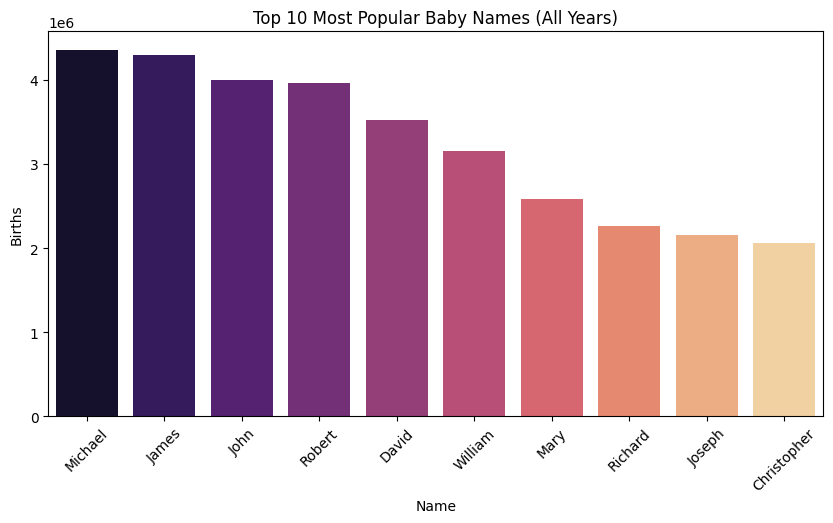

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10 = top_100.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Name', y='Births', data=top_10, palette='magma')
plt.title('Top 10 Most Popular Baby Names (All Years)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
gender_group = df.groupby(['Name', 'Gender'])['Births'].sum().reset_index()
top_gender = gender_group.sort_values(by='Births', ascending=False).head(100)
print(top_gender.head(10))



               Name Gender   Births
73235       Michael      M  4337069
44767         James      M  4281249
49741          John      M  3978904
87122        Robert      M  3944261
25034         David      M  3513619
107686      William      M  3147139
70854          Mary      F  2574458
86498       Richard      M  2253547
50560        Joseph      M  2148466
20446   Christopher      M  2058070


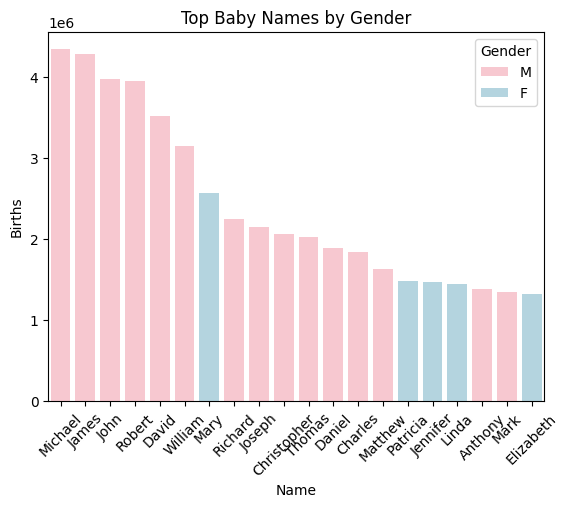

In [ ]:
sns.barplot(x='Name', y='Births', hue='Gender', data=top_gender.head(20), palette=['pink', 'lightblue'])
plt.title('Top Baby Names by Gender')
plt.xticks(rotation=45)
plt.show()
